In [ ]:
# Importing the Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
# Loading train data set
train_data = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Dataset/Flight Price Prediction/Data_Train.xlsx')

In [ ]:
type(train_data)

pandas.core.frame.DataFrame

In [ ]:
train_data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662


In [ ]:
train_data.tail(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648
10682,Air India,9/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,10:55,19:15,8h 20m,2 stops,No info,11753


In [ ]:
train_data.shape

(10683, 11)

In [ ]:
# Loading test data set
test_data = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Dataset/Flight Price Prediction/Test_set.xlsx')

In [ ]:
type(test_data)

pandas.core.frame.DataFrame

In [ ]:
test_data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info


In [ ]:
test_data.shape

(2671, 10)

In [ ]:
# Merge train and test data
flight_dataset = train_data.append(test_data)

In [ ]:
type(flight_dataset)

pandas.core.frame.DataFrame

In [ ]:
flight_dataset.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0


In [ ]:
flight_dataset.tail(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info,NaN
2670,Multiple carriers,15/06/2019,Delhi,Cochin,DEL → BOM → COK,04:55,19:15,14h 20m,1 stop,No info,NaN


In [ ]:
flight_dataset.shape

(13354, 11)

In [ ]:
flight_dataset.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [ ]:
flight_dataset.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [ ]:
flight_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Date_of_Journey  13354 non-null  object 
 2   Source           13354 non-null  object 
 3   Destination      13354 non-null  object 
 4   Route            13353 non-null  object 
 5   Dep_Time         13354 non-null  object 
 6   Arrival_Time     13354 non-null  object 
 7   Duration         13354 non-null  object 
 8   Total_Stops      13353 non-null  object 
 9   Additional_Info  13354 non-null  object 
 10  Price            10683 non-null  float64
dtypes: float64(1), object(10)
memory usage: 1.2+ MB


In [ ]:
# null values
flight_dataset.isnull().sum()

Airline               0
Date_of_Journey       0
Source                0
Destination           0
Route                 1
Dep_Time              0
Arrival_Time          0
Duration              0
Total_Stops           1
Additional_Info       0
Price              2671
dtype: int64

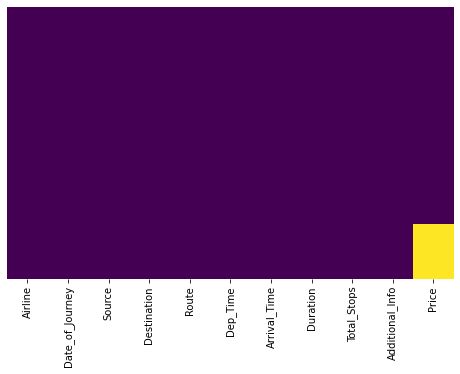

In [ ]:
plt.figure(figsize=(8,5))
sns.heatmap(flight_dataset.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [ ]:
# null values column name
[feature for feature in flight_dataset.isnull() if flight_dataset[feature].isnull().sum()>0 ]

['Route', 'Total_Stops', 'Price']

In [ ]:
flight_dataset.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0


In [ ]:
flight_dataset['Date_of_Journey'].str.split('/').str[0]

0       24
1        1
2        9
3       12
4       01
        ..
2666     6
2667    27
2668     6
2669     6
2670    15
Name: Date_of_Journey, Length: 13354, dtype: object

In [ ]:
# Date_of_Journey column splitting into Day, Month and Year
flight_dataset['Date'] = flight_dataset['Date_of_Journey'].str.split('/').str[0]
flight_dataset['Month'] = flight_dataset['Date_of_Journey'].str.split('/').str[1]
flight_dataset['Year'] = flight_dataset['Date_of_Journey'].str.split('/').str[2]

In [ ]:
# anoyher way using lambda function Date_of_Journey column splitting into Day, Month and Year

# flight_dataset['Date'] = flight_dataset['Date_of_Journey'].apply(lambda x:x.split("/")[0])
# flight_dataset['Month'] = flight_dataset['Date_of_Journey'].apply(lambda x:x.split("/")[1])
# flight_dataset['Year'] = flight_dataset['Date_of_Journey'].apply(lambda x:x.split("/")[2])

In [ ]:
flight_dataset.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,03,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,05,2019


In [ ]:
flight_dataset.dtypes

Airline             object
Date_of_Journey     object
Source              object
Destination         object
Route               object
Dep_Time            object
Arrival_Time        object
Duration            object
Total_Stops         object
Additional_Info     object
Price              float64
Date                object
Month               object
Year                object
dtype: object

In [ ]:
# convert data type object to integer
flight_dataset['Date'] = flight_dataset['Date'].astype(int)
flight_dataset['Month'] = flight_dataset['Month'].astype(int)
flight_dataset['Year'] = flight_dataset['Year'].astype(int)

In [ ]:
flight_dataset.dtypes

Airline             object
Date_of_Journey     object
Source              object
Destination         object
Route               object
Dep_Time            object
Arrival_Time        object
Duration            object
Total_Stops         object
Additional_Info     object
Price              float64
Date                 int64
Month                int64
Year                 int64
dtype: object

In [ ]:
flight_dataset.drop('Date_of_Journey', axis=1, inplace=True)

In [ ]:
flight_dataset.head(2)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,5,2019


In [ ]:
# Dep_Time column are spit into Dep_hour and Dep_min
flight_dataset['Dep_hour'] = flight_dataset['Dep_Time'].str.split(':').str[0]
flight_dataset['Dep_min'] = flight_dataset['Dep_Time'].str.split(':').str[1]

flight_dataset['Dep_hour'] = flight_dataset['Dep_hour'].astype(int)
flight_dataset['Dep_min'] = flight_dataset['Dep_min'].astype(int)

In [ ]:
# anoyher way using lambda function Dep_Time column are spit into Dep_hour and Dep_min

# flight_dataset['Dep_hour'] = flight_dataset['Dep_Time'].apply(lambda x:x.split(":")[0])
# flight_dataset['Dep_min'] = flight_dataset['Dep_Time'].apply(lambda x:x.split(":")[1])

In [ ]:
flight_dataset.drop('Dep_Time', axis=1, inplace=True)

In [ ]:
flight_dataset.head(2)

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,3,2019,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662.0,1,5,2019,5,50


In [ ]:
flight_dataset['Arrival_Time'].unique()

array(['01:10 22 Mar', '13:15', '04:25 10 Jun', ..., '00:20 07 Mar',
       '00:20 02 Apr', '07:45 13 May'], dtype=object)

In [ ]:
flight_dataset['Arrival_Time'].str.split(' ')

0       [01:10, 22, Mar]
1                [13:15]
2       [04:25, 10, Jun]
3                [23:30]
4                [21:35]
              ...       
2666    [20:25, 07, Jun]
2667             [16:55]
2668    [04:25, 07, Mar]
2669             [19:15]
2670             [19:15]
Name: Arrival_Time, Length: 13354, dtype: object

In [ ]:
flight_dataset['Arrival_Time'].str.split(' ').str[0]

0       01:10
1       13:15
2       04:25
3       23:30
4       21:35
        ...  
2666    20:25
2667    16:55
2668    04:25
2669    19:15
2670    19:15
Name: Arrival_Time, Length: 13354, dtype: object

In [ ]:
# Arrival_Time column are spit into Arrival_time, Arrival_date and Arrival_month

flight_dataset['Arrival_time'] = flight_dataset['Arrival_Time'].str.split(' ').str[0]
flight_dataset['Arrival_date'] = flight_dataset['Arrival_Time'].str.split(' ').str[1]
flight_dataset['Arrival_month'] = flight_dataset['Arrival_Time'].str.split(' ').str[2]

In [ ]:
# anoyher way using lambda function Arrival_Time column are spit into Arrival_time, Arrival_date and Arrival_month

# flight_dataset['Arrival_time'] = flight_dataset['Arrival_Time'].apply(lambda x:x.split(" ")[0])
# flight_dataset['Arrival_date'] = flight_dataset['Arrival_Time'].apply(lambda x:x.split(" ")[1])
# flight_dataset['Arrival_month'] = flight_dataset['Arrival_Time'].apply(lambda x:x.split(" ")[1])

In [ ]:
flight_dataset.head(2)

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Dep_hour,Dep_min,Arrival_time,Arrival_date,Arrival_month
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,3,2019,22,20,01:10,22,Mar
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662.0,1,5,2019,5,50,13:15,NaN,NaN


In [ ]:
# now new created Arrival_time column are spit into Arrival_hour and Arrival_min

flight_dataset['Arrival_hour'] = flight_dataset['Arrival_time'].str.split(':').str[0]
flight_dataset['Arrival_min'] = flight_dataset['Arrival_time'].str.split(':').str[1]

In [ ]:
# anoyher way using lambda function now new created Arrival_time column are spit into Arrival_hour and Arrival_min

# flight_dataset['Arrival_hour'] = flight_dataset['Arrival_time'].apply(lambda x:x.split(":")[0])
# flight_dataset['Arrival_min'] = flight_dataset['Arrival_time'].apply(lambda x:x.split(":")[1])

In [ ]:
flight_dataset.head(2)

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Dep_hour,Dep_min,Arrival_time,Arrival_date,Arrival_month,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,3,2019,22,20,01:10,22,Mar,01,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662.0,1,5,2019,5,50,13:15,NaN,NaN,13,15


In [ ]:
flight_dataset.drop(['Arrival_Time', 'Arrival_time'], axis=1, inplace=True)

In [ ]:
flight_dataset.head(1)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Dep_hour,Dep_min,Arrival_date,Arrival_month,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897.0,24,3,2019,22,20,22,Mar,01,10


In [ ]:
flight_dataset.dtypes

Airline             object
Source              object
Destination         object
Route               object
Duration            object
Total_Stops         object
Additional_Info     object
Price              float64
Date                 int64
Month                int64
Year                 int64
Dep_hour             int64
Dep_min              int64
Arrival_date        object
Arrival_month       object
Arrival_hour        object
Arrival_min         object
dtype: object

In [ ]:
flight_dataset.isnull().sum()

Airline               0
Source                0
Destination           0
Route                 1
Duration              0
Total_Stops           1
Additional_Info       0
Price              2671
Date                  0
Month                 0
Year                  0
Dep_hour              0
Dep_min               0
Arrival_date       7953
Arrival_month      7953
Arrival_hour          0
Arrival_min           0
dtype: int64

In [ ]:
#  Null value checking For Arrival_date 
flight_dataset['Arrival_date'].isnull().sum()

7953

In [ ]:
flight_dataset['Arrival_date'].unique()

array(['22', nan, '10', '13', '02', '04', '28', '19', '07', '16', '25',
       '20', '23', '11', '03', '08', '05', '26', '29', '17'], dtype=object)

In [ ]:
flight_dataset['Arrival_date'].mode()

0    10
dtype: object

In [ ]:
flight_dataset['Arrival_date'].mode()[0]

'10'

In [ ]:
# fill null value with mode value
flight_dataset['Arrival_date'] = flight_dataset['Arrival_date'].fillna(flight_dataset['Arrival_date'].mode()[0])

In [ ]:
flight_dataset['Arrival_date'].isnull().sum()

0

In [ ]:
# Null value checking For Arrival_month 
flight_dataset['Arrival_month'].isnull().sum()

7953

In [ ]:
flight_dataset['Arrival_month'].unique()

array(['Mar', nan, 'Jun', 'May', 'Apr'], dtype=object)

In [ ]:
flight_dataset['Arrival_month'].mode()

0    May
dtype: object

In [ ]:
flight_dataset['Arrival_month'].mode()[0]

'May'

In [ ]:
# fill null value with mode value
flight_dataset['Arrival_month'] = flight_dataset['Arrival_date'].fillna(flight_dataset['Arrival_month'].mode()[0])

In [ ]:
flight_dataset['Arrival_month'].isnull().sum()

0

In [ ]:
# convert data type object to integer
flight_dataset['Arrival_date'] = flight_dataset['Arrival_date'].astype(int)
flight_dataset['Arrival_month'] = flight_dataset['Arrival_month'].astype(int)
flight_dataset['Arrival_hour'] = flight_dataset['Arrival_hour'].astype(int)
flight_dataset['Arrival_min'] = flight_dataset['Arrival_min'].astype(int)

In [ ]:
flight_dataset.dtypes

Airline             object
Source              object
Destination         object
Route               object
Duration            object
Total_Stops         object
Additional_Info     object
Price              float64
Date                 int64
Month                int64
Year                 int64
Dep_hour             int64
Dep_min              int64
Arrival_date         int64
Arrival_month        int64
Arrival_hour         int64
Arrival_min          int64
dtype: object

In [ ]:
flight_dataset.head(2)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Dep_hour,Dep_min,Arrival_date,Arrival_month,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897.0,24,3,2019,22,20,22,22,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662.0,1,5,2019,5,50,10,10,13,15


In [ ]:
# Duration	
flight_dataset['Duration'].unique()

array(['2h 50m', '7h 25m', '19h', '5h 25m', '4h 45m', '2h 25m', '15h 30m',
       '21h 5m', '25h 30m', '7h 50m', '13h 15m', '2h 35m', '2h 15m',
       '12h 10m', '26h 35m', '4h 30m', '22h 35m', '23h', '20h 35m',
       '5h 10m', '15h 20m', '2h 55m', '13h 20m', '15h 10m', '5h 45m',
       '5h 55m', '13h 25m', '22h', '5h 30m', '10h 25m', '5h 15m',
       '2h 30m', '6h 15m', '11h 55m', '11h 5m', '8h 30m', '22h 5m',
       '2h 45m', '12h', '16h 5m', '19h 55m', '3h 15m', '25h 20m', '3h',
       '16h 15m', '15h 5m', '6h 30m', '25h 5m', '12h 25m', '27h 20m',
       '10h 15m', '10h 30m', '1h 30m', '1h 25m', '26h 30m', '7h 20m',
       '13h 30m', '5h', '19h 5m', '14h 50m', '2h 40m', '22h 10m',
       '9h 35m', '10h', '21h 20m', '18h 45m', '12h 20m', '18h', '9h 15m',
       '17h 30m', '16h 35m', '12h 15m', '7h 30m', '24h', '8h 55m',
       '7h 10m', '14h 30m', '30h 20m', '15h', '12h 45m', '10h 10m',
       '15h 25m', '14h 5m', '20h 15m', '23h 10m', '18h 10m', '16h',
       '2h 20m', '8h', '16h 5

In [ ]:
flight_dataset['Duration'].str.split(' ')

0        [2h, 50m]
1        [7h, 25m]
2            [19h]
3        [5h, 25m]
4        [4h, 45m]
           ...    
2666    [23h, 55m]
2667     [2h, 35m]
2668     [6h, 35m]
2669    [15h, 15m]
2670    [14h, 20m]
Name: Duration, Length: 13354, dtype: object

In [ ]:
# Duration column are split into space
flight_dataset['Duration'].str.split(' ').str[0]

0        2h
1        7h
2       19h
3        5h
4        4h
       ... 
2666    23h
2667     2h
2668     6h
2669    15h
2670    14h
Name: Duration, Length: 13354, dtype: object

In [ ]:
# Duration column are split into space [ first column are represent by hour]
flight_dataset['Duration'].str.split(' ').str[0].unique()

array(['2h', '7h', '19h', '5h', '4h', '15h', '21h', '25h', '13h', '12h',
       '26h', '22h', '23h', '20h', '10h', '6h', '11h', '8h', '16h', '3h',
       '27h', '1h', '14h', '9h', '18h', '17h', '24h', '30h', '28h', '29h',
       '37h', '34h', '38h', '35h', '36h', '47h', '33h', '32h', '31h',
       '42h', '39h', '5m', '41h', '40h'], dtype=object)

In Duration column all value are represented by hour but one value represent by min.

In [ ]:
# split by h
flight_dataset['Duration'].str.split(' ').str[0].str.split('h').str[0]

0        2
1        7
2       19
3        5
4        4
        ..
2666    23
2667     2
2668     6
2669    15
2670    14
Name: Duration, Length: 13354, dtype: object

In [ ]:
flight_dataset['Duration_hour'] = flight_dataset['Duration'].str.split(' ').str[0].str.split('h').str[0]

In [ ]:
flight_dataset.head(2)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Dep_hour,Dep_min,Arrival_date,Arrival_month,Arrival_hour,Arrival_min,Duration_hour
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897.0,24,3,2019,22,20,22,22,1,10,2
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662.0,1,5,2019,5,50,10,10,13,15,7


In [ ]:
# checking Duration_hour column how many minute value are present 
flight_dataset[flight_dataset['Duration_hour'] == '5m']

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Dep_hour,Dep_min,Arrival_date,Arrival_month,Arrival_hour,Arrival_min,Duration_hour
6474,Air India,Mumbai,Hyderabad,BOM → GOI → PNQ → HYD,5m,2 stops,No info,17327.0,6,3,2019,16,50,10,10,16,55,5m
2660,Air India,Mumbai,Hyderabad,BOM → GOI → PNQ → HYD,5m,2 stops,No info,NaN,12,3,2019,16,50,10,10,16,55,5m


In [ ]:
# to remove minute values from Duration_hour column split by m
flight_dataset['Duration_hour'].str.split('m').str[0]

0        2
1        7
2       19
3        5
4        4
        ..
2666    23
2667     2
2668     6
2669    15
2670    14
Name: Duration_hour, Length: 13354, dtype: object

In [ ]:
flight_dataset['Duration_hour'].str.split('m').str[0].unique()

array(['2', '7', '19', '5', '4', '15', '21', '25', '13', '12', '26', '22',
       '23', '20', '10', '6', '11', '8', '16', '3', '27', '1', '14', '9',
       '18', '17', '24', '30', '28', '29', '37', '34', '38', '35', '36',
       '47', '33', '32', '31', '42', '39', '41', '40'], dtype=object)

In [ ]:
flight_dataset['Duration_hour'] = flight_dataset['Duration_hour'].str.split('m').str[0]

In [ ]:
# Duration_min
flight_dataset['Duration'].str.split(' ').str[1].unique()

array(['50m', '25m', nan, '45m', '30m', '5m', '15m', '35m', '10m', '20m',
       '55m', '40m'], dtype=object)

In [ ]:
flight_dataset['Duration_min'] = flight_dataset['Duration'].str.split(' ').str[1].str.split('m').str[0]

In [ ]:
flight_dataset['Duration_min'].unique()

array(['50', '25', nan, '45', '30', '5', '15', '35', '10', '20', '55',
       '40'], dtype=object)

In [ ]:
flight_dataset.isnull().sum()

Airline               0
Source                0
Destination           0
Route                 1
Duration              0
Total_Stops           1
Additional_Info       0
Price              2671
Date                  0
Month                 0
Year                  0
Dep_hour              0
Dep_min               0
Arrival_date          0
Arrival_month         0
Arrival_hour          0
Arrival_min           0
Duration_hour         0
Duration_min       1286
dtype: int64

In [ ]:
flight_dataset['Duration_min'].mode()[0]

'30'

In [ ]:
flight_dataset['Duration_min'] = flight_dataset['Duration_min'].fillna(flight_dataset['Duration_min'].mode()[0])

In [ ]:
flight_dataset.isnull().sum()

Airline               0
Source                0
Destination           0
Route                 1
Duration              0
Total_Stops           1
Additional_Info       0
Price              2671
Date                  0
Month                 0
Year                  0
Dep_hour              0
Dep_min               0
Arrival_date          0
Arrival_month         0
Arrival_hour          0
Arrival_min           0
Duration_hour         0
Duration_min          0
dtype: int64

In [ ]:
flight_dataset.dtypes

Airline             object
Source              object
Destination         object
Route               object
Duration            object
Total_Stops         object
Additional_Info     object
Price              float64
Date                 int64
Month                int64
Year                 int64
Dep_hour             int64
Dep_min              int64
Arrival_date         int64
Arrival_month        int64
Arrival_hour         int64
Arrival_min          int64
Duration_hour       object
Duration_min        object
dtype: object

In [ ]:
flight_dataset['Duration_hour'] = flight_dataset['Duration_hour'].astype(int)
flight_dataset['Duration_min'] = flight_dataset['Duration_min'].astype(int)

In [ ]:
flight_dataset.dtypes

Airline             object
Source              object
Destination         object
Route               object
Duration            object
Total_Stops         object
Additional_Info     object
Price              float64
Date                 int64
Month                int64
Year                 int64
Dep_hour             int64
Dep_min              int64
Arrival_date         int64
Arrival_month        int64
Arrival_hour         int64
Arrival_min          int64
Duration_hour        int64
Duration_min         int64
dtype: object

In [ ]:
flight_dataset.head(2)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Dep_hour,Dep_min,Arrival_date,Arrival_month,Arrival_hour,Arrival_min,Duration_hour,Duration_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897.0,24,3,2019,22,20,22,22,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662.0,1,5,2019,5,50,10,10,13,15,7,25


In [ ]:
flight_dataset.drop('Duration', axis=1, inplace=True)

In [ ]:
flight_dataset.head(2)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Date,Month,Year,Dep_hour,Dep_min,Arrival_date,Arrival_month,Arrival_hour,Arrival_min,Duration_hour,Duration_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897.0,24,3,2019,22,20,22,22,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662.0,1,5,2019,5,50,10,10,13,15,7,25


In [ ]:
flight_dataset['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'],
      dtype=object)

In [ ]:
flight_dataset[flight_dataset['Total_Stops']=='non-stop'].head(2)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Date,Month,Year,Dep_hour,Dep_min,Arrival_date,Arrival_month,Arrival_hour,Arrival_min,Duration_hour,Duration_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897.0,24,3,2019,22,20,22,22,1,10,2,50
5,SpiceJet,Kolkata,Banglore,CCU → BLR,non-stop,No info,3873.0,24,6,2019,9,0,10,10,11,25,2,25


In [ ]:
flight_dataset[flight_dataset['Total_Stops'].isnull()].head(2)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Date,Month,Year,Dep_hour,Dep_min,Arrival_date,Arrival_month,Arrival_hour,Arrival_min,Duration_hour,Duration_min
9039,Air India,Delhi,Cochin,NaN,NaN,No info,7480.0,6,5,2019,9,45,7,7,9,25,23,40


In [ ]:
flight_dataset['Total_Stops'] = flight_dataset['Total_Stops'].map({'non-stop':0, '1 stop':1, '2 stops':2, '3 stops':3, '4 stops':4, 'nan':1,})

In [ ]:
flight_dataset['Total_Stops'].unique()

array([ 0.,  2.,  1.,  3., nan,  4.])

In [ ]:
flight_dataset['Total_Stops'].mode()[0]

1.0

In [ ]:
flight_dataset['Total_Stops'] = flight_dataset['Total_Stops'].fillna(flight_dataset['Total_Stops'].mode()[0])

In [ ]:
flight_dataset.isnull().sum()

Airline               0
Source                0
Destination           0
Route                 1
Total_Stops           0
Additional_Info       0
Price              2671
Date                  0
Month                 0
Year                  0
Dep_hour              0
Dep_min               0
Arrival_date          0
Arrival_month         0
Arrival_hour          0
Arrival_min           0
Duration_hour         0
Duration_min          0
dtype: int64

In [ ]:
flight_dataset.dtypes

Airline             object
Source              object
Destination         object
Route               object
Total_Stops        float64
Additional_Info     object
Price              float64
Date                 int64
Month                int64
Year                 int64
Dep_hour             int64
Dep_min              int64
Arrival_date         int64
Arrival_month        int64
Arrival_hour         int64
Arrival_min          int64
Duration_hour        int64
Duration_min         int64
dtype: object

In [ ]:
flight_dataset['Total_Stops'] = flight_dataset['Total_Stops'].astype(int)

In [ ]:
flight_dataset['Total_Stops'].dtypes

dtype('int64')

In [ ]:
flight_dataset.drop('Route', axis=1, inplace=True)

In [ ]:
flight_dataset.head(2)

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,Dep_hour,Dep_min,Arrival_date,Arrival_month,Arrival_hour,Arrival_min,Duration_hour,Duration_min
0,IndiGo,Banglore,New Delhi,0,No info,3897.0,24,3,2019,22,20,22,22,1,10,2,50
1,Air India,Kolkata,Banglore,2,No info,7662.0,1,5,2019,5,50,10,10,13,15,7,25


In [ ]:
flight_dataset['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


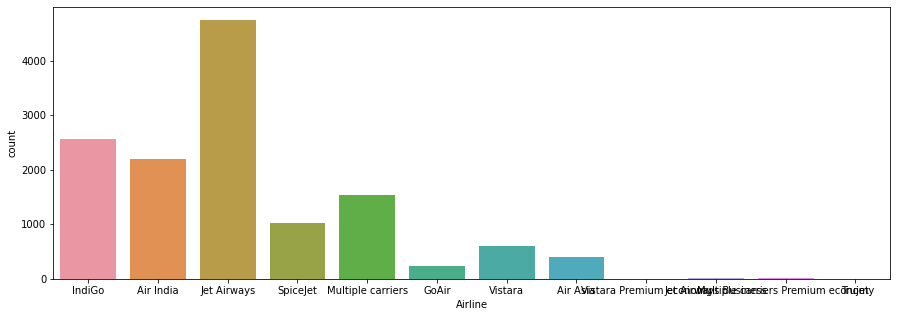

In [ ]:
plt.figure(figsize=(15,5))
sns.countplot('Airline', data=flight_dataset)

In [ ]:
flight_dataset['Source'].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


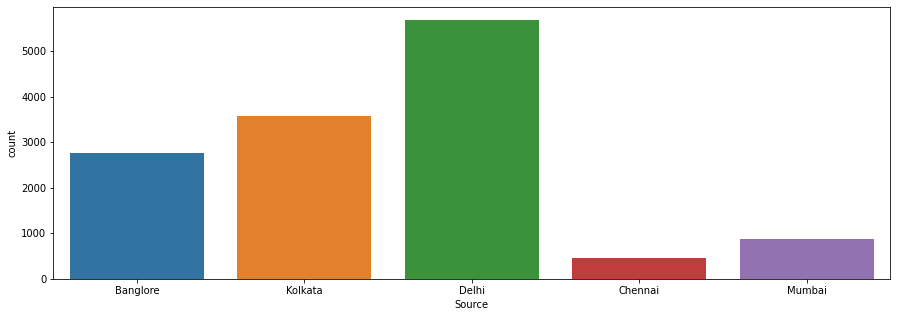

In [ ]:
plt.figure(figsize=(15,5))
sns.countplot('Source', data=flight_dataset)

In [ ]:
flight_dataset['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


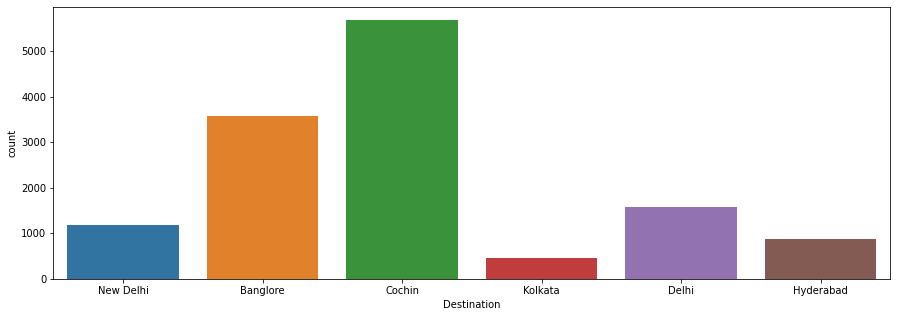

In [ ]:
plt.figure(figsize=(15,5))
sns.countplot('Destination', data=flight_dataset)

In [ ]:
flight_dataset['Additional_Info'].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


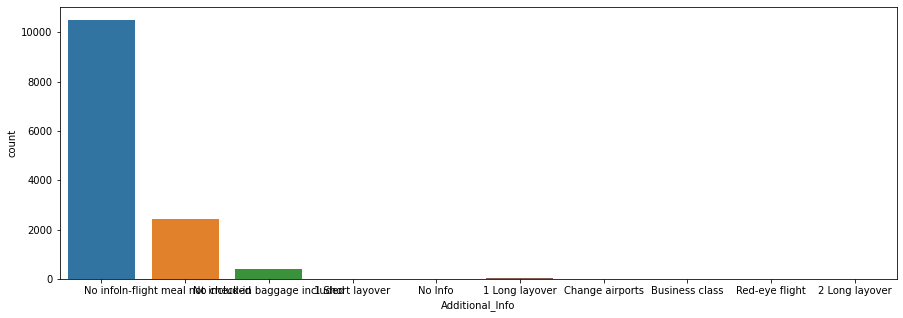

In [ ]:
plt.figure(figsize=(15,5))
sns.countplot('Additional_Info', data=flight_dataset)

In [ ]:
flight_dataset['Source'] = flight_dataset['Source'].map({'Banglore':1, 'Kolkata':2, 'Delhi':3, 'Chennai':4, 'Mumbai':5})

In [ ]:
flight_dataset['Destination'] = flight_dataset['Destination'].map({'Banglore':1, 'Kolkata':2, 'Delhi':3, 'New Delhi':4, 'Cochin':5, 'Hyderabad':6})

In [ ]:
# pd.get_dummies(flight_dataset, columns=['Airline', 'Additional_Info'], drop_first=True)

In [ ]:
# import LabelEncoder
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [ ]:
# perform fit and transform Airline and Additional_Info column using LabelEncoder object.fit_transform function
flight_dataset['Airline'] = encoder.fit_transform(flight_dataset['Airline'])
flight_dataset['Additional_Info'] = encoder.fit_transform(flight_dataset['Additional_Info'])

In [ ]:
flight_dataset.head(2)

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,Dep_hour,Dep_min,Arrival_date,Arrival_month,Arrival_hour,Arrival_min,Duration_hour,Duration_min
0,3,1,4,0,8,3897.0,24,3,2019,22,20,22,22,1,10,2,50
1,1,2,1,2,8,7662.0,1,5,2019,5,50,10,10,13,15,7,25


In [ ]:
flight_dataset.shape

(13354, 17)

In [ ]:
flight_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  int64  
 1   Source           13354 non-null  int64  
 2   Destination      13354 non-null  int64  
 3   Total_Stops      13354 non-null  int64  
 4   Additional_Info  13354 non-null  int64  
 5   Price            10683 non-null  float64
 6   Date             13354 non-null  int64  
 7   Month            13354 non-null  int64  
 8   Year             13354 non-null  int64  
 9   Dep_hour         13354 non-null  int64  
 10  Dep_min          13354 non-null  int64  
 11  Arrival_date     13354 non-null  int64  
 12  Arrival_month    13354 non-null  int64  
 13  Arrival_hour     13354 non-null  int64  
 14  Arrival_min      13354 non-null  int64  
 15  Duration_hour    13354 non-null  int64  
 16  Duration_min     13354 non-null  int64  
dtypes: float64(1)

In [ ]:
flight_dataset.describe()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,Dep_hour,Dep_min,Arrival_date,Arrival_month,Arrival_hour,Arrival_min,Duration_hour,Duration_min
count,13354.000000,13354.000000,13354.000000,13354.000000,13354.000000,10683.000000,13354.000000,13354.000000,13354.0,13354.000000,13354.000000,13354.000000,13354.000000,13354.000000,13354.000000,13354.000000,13354.000000
mean,3.977086,2.486072,3.566497,0.826045,7.407743,9087.064121,13.389846,4.710574,2019.0,12.513254,24.507264,11.675902,11.675902,13.396061,24.664146,10.235435,31.229969
std,2.363997,1.061641,1.780669,0.674608,1.198393,4611.359167,8.439060,1.165622,0.0,5.736273,18.832385,5.650319,5.650319,6.896145,16.559723,8.473605,14.156090
min,0.000000,1.000000,1.000000,0.000000,0.000000,1759.000000,1.000000,3.000000,2019.0,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000,1.000000,5.000000
25%,3.000000,2.000000,1.000000,0.000000,8.000000,5277.000000,6.000000,3.000000,2019.0,8.000000,5.000000,10.000000,10.000000,8.000000,10.000000,2.000000,20.000000
50%,4.000000,3.000000,4.000000,1.000000,8.000000,8372.000000,12.000000,5.000000,2019.0,11.000000,25.000000,10.000000,10.000000,14.000000,25.000000,8.000000,30.000000
75%,4.000000,3.000000,5.000000,1.000000,8.000000,12373.000000,21.000000,6.000000,2019.0,18.000000,40.000000,10.000000,10.000000,19.000000,35.000000,15.000000,45.000000
max,11.000000,5.000000,6.000000,4.000000,9.000000,79512.000000,27.000000,6.000000,2019.0,23.000000,55.000000,29.000000,29.000000,23.000000,55.000000,47.000000,55.000000


# Visualization

In [ ]:
flight_dataset.columns

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Additional_Info',
       'Price', 'Date', 'Month', 'Year', 'Dep_hour', 'Dep_min', 'Arrival_date',
       'Arrival_month', 'Arrival_hour', 'Arrival_min', 'Duration_hour',
       'Duration_min'],
      dtype='object')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


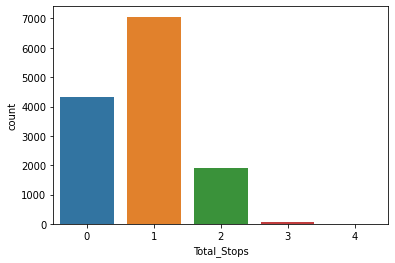

In [ ]:
sns.countplot('Total_Stops', data=flight_dataset)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


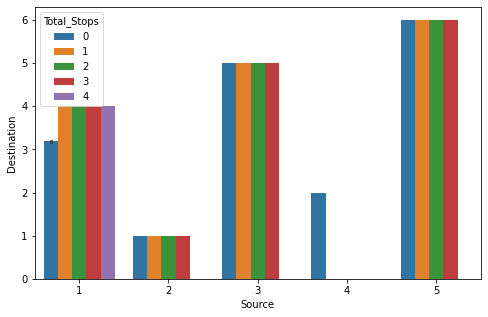

In [ ]:
plt.figure(figsize=(8,5))
sns.barplot('Source', 'Destination', hue='Total_Stops', data=flight_dataset)

In [ ]:
flight_dataset.columns

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Additional_Info',
       'Price', 'Date', 'Month', 'Year', 'Dep_hour', 'Dep_min', 'Arrival_date',
       'Arrival_month', 'Arrival_hour', 'Arrival_min', 'Duration_hour',
       'Duration_min'],
      dtype='object')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


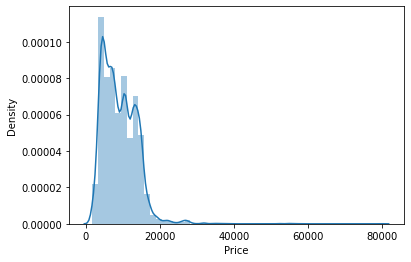

In [ ]:
sns.distplot(flight_dataset['Price'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


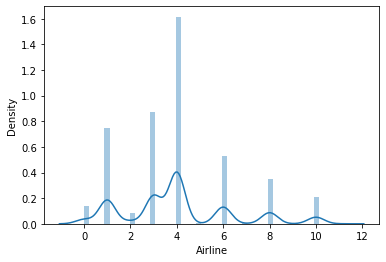

In [ ]:
sns.distplot(flight_dataset['Airline'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


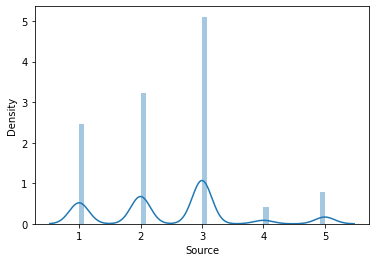

In [ ]:
sns.distplot(flight_dataset['Source'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


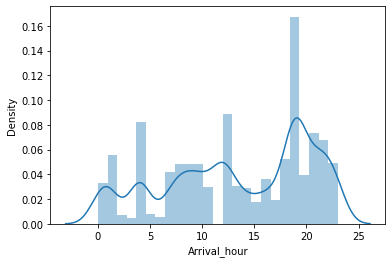

In [ ]:
sns.distplot(flight_dataset['Arrival_hour'])

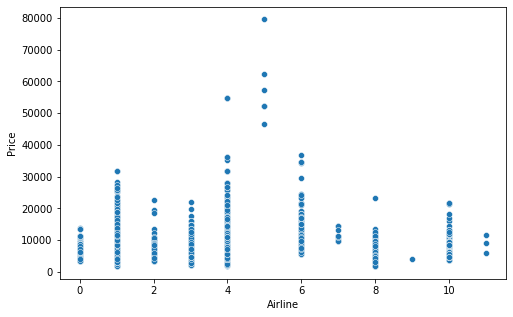

In [ ]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='Airline', y='Price', data=flight_dataset)

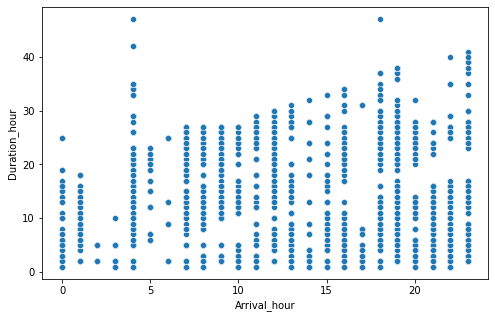

In [ ]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='Arrival_hour', y='Duration_hour', data=flight_dataset)

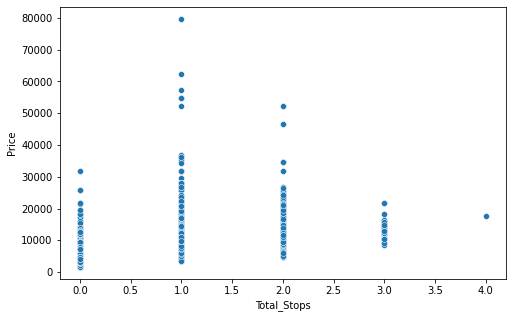

In [ ]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='Total_Stops', y='Price', data=flight_dataset)

In [ ]:
flight_dataset.head(2)

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,Dep_hour,Dep_min,Arrival_date,Arrival_month,Arrival_hour,Arrival_min,Duration_hour,Duration_min
0,3,1,4,0,8,3897.0,24,3,2019,22,20,22,22,1,10,2,50
1,1,2,1,2,8,7662.0,1,5,2019,5,50,10,10,13,15,7,25


In [ ]:
# correlation
correlation = flight_dataset.corr()
correlation

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,Dep_hour,Dep_min,Arrival_date,Arrival_month,Arrival_hour,Arrival_min,Duration_hour,Duration_min
Airline,1.000000,0.041738,-0.010597,-0.206350,-0.058533,-0.039520,0.020666,0.028929,NaN,-0.026127,-0.057826,-0.037173,-0.037173,-0.007831,-0.074001,-0.161633,-0.028440
Source,0.041738,1.000000,0.536858,0.102699,0.041401,-0.052779,0.049915,0.134451,NaN,-0.071590,-0.016881,0.037263,0.037263,-0.023208,-0.093865,0.015291,-0.275584
Destination,-0.010597,0.536858,1.000000,0.162214,0.025844,0.098305,0.061621,-0.053093,NaN,-0.156121,-0.003780,0.033769,0.033769,-0.041765,-0.137092,0.024211,-0.042112
Total_Stops,-0.206350,0.102699,0.162214,1.000000,-0.079092,0.603883,-0.011081,0.046920,NaN,-0.070709,-0.000116,0.185785,0.185785,0.037154,-0.108233,0.738982,-0.137806
Additional_Info,-0.058533,0.041401,0.025844,-0.079092,1.000000,-0.065478,-0.018370,-0.043376,NaN,-0.054881,-0.013346,-0.082244,-0.082244,0.022070,0.039978,-0.166273,0.039610
Price,-0.039520,-0.052779,0.098305,0.603883,-0.065478,1.000000,-0.153738,-0.103651,NaN,0.006819,-0.024492,0.041793,0.041793,0.024264,-0.086155,0.508796,-0.112485
Date,0.020666,0.049915,0.061621,-0.011081,-0.018370,-0.153738,1.000000,-0.035495,NaN,-0.002970,-0.008988,0.576738,0.576738,0.000982,-0.014631,-0.022786,0.002480
Month,0.028929,0.134451,-0.053093,0.046920,-0.043376,-0.103651,-0.035495,1.000000,NaN,0.034494,-0.069407,-0.012436,-0.012436,-0.003226,-0.110276,0.009629,-0.014620
Year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dep_hour,-0.026127,-0.071590,-0.156121,-0.070709,-0.054881,0.006819,-0.002970,0.034494,NaN,1.000000,-0.026674,0.181611,0.181611,0.004296,0.067645,-0.001605,-0.028991


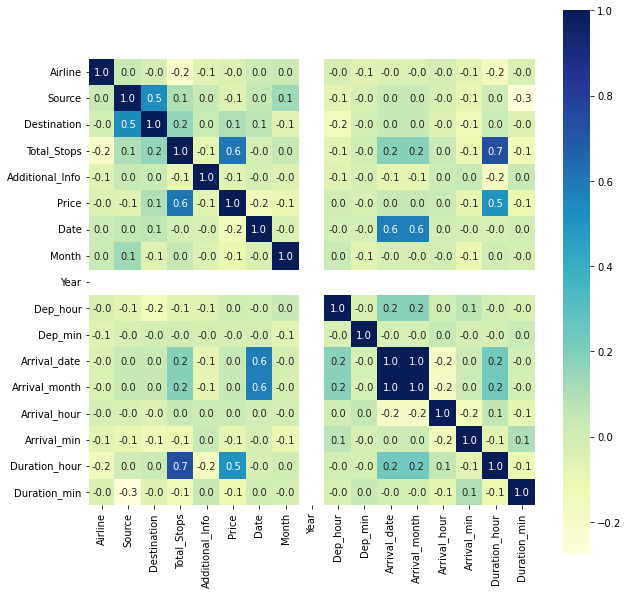

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':10}, cmap='YlGnBu')

In [ ]:
flight_dataset_test = flight_dataset[flight_dataset['Price'].isnull()]
flight_dataset_test

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,Dep_hour,Dep_min,Arrival_date,Arrival_month,Arrival_hour,Arrival_min,Duration_hour,Duration_min
0,4,3,5,1,8,NaN,6,6,2019,17,30,7,7,4,25,10,55
1,3,2,1,1,8,NaN,12,5,2019,6,20,10,10,10,20,4,30
2,4,3,5,1,5,NaN,21,5,2019,19,15,22,22,19,0,23,45
3,6,3,5,1,8,NaN,21,5,2019,8,0,10,10,21,0,13,30
4,0,1,3,0,8,NaN,24,6,2019,23,55,25,25,2,45,2,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,1,2,1,1,8,NaN,6,6,2019,20,30,7,7,20,25,23,55
2667,3,2,1,0,8,NaN,27,3,2019,14,20,10,10,16,55,2,35
2668,4,3,5,1,8,NaN,6,3,2019,21,50,7,7,4,25,6,35
2669,1,3,5,1,8,NaN,6,3,2019,4,0,10,10,19,15,15,15


In [ ]:
flight_dataset_train = flight_dataset[~flight_dataset['Price'].isnull()]
flight_dataset_train

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,Dep_hour,Dep_min,Arrival_date,Arrival_month,Arrival_hour,Arrival_min,Duration_hour,Duration_min
0,3,1,4,0,8,3897.0,24,3,2019,22,20,22,22,1,10,2,50
1,1,2,1,2,8,7662.0,1,5,2019,5,50,10,10,13,15,7,25
2,4,3,5,2,8,13882.0,9,6,2019,9,25,10,10,4,25,19,30
3,3,2,1,1,8,6218.0,12,5,2019,18,5,10,10,23,30,5,25
4,3,1,4,1,8,13302.0,1,3,2019,16,50,10,10,21,35,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,2,1,0,8,4107.0,9,4,2019,19,55,10,10,22,25,2,30
10679,1,2,1,0,8,4145.0,27,4,2019,20,45,10,10,23,20,2,35
10680,4,1,3,0,8,7229.0,27,4,2019,8,20,10,10,11,20,3,30
10681,10,1,4,0,8,12648.0,1,3,2019,11,30,10,10,14,10,2,40


In [ ]:
X = flight_dataset_train.drop('Price', axis=1)

In [ ]:
X.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Date,Month,Year,Dep_hour,Dep_min,Arrival_date,Arrival_month,Arrival_hour,Arrival_min,Duration_hour,Duration_min
0,3,1,4,0,8,24,3,2019,22,20,22,22,1,10,2,50
1,1,2,1,2,8,1,5,2019,5,50,10,10,13,15,7,25
2,4,3,5,2,8,9,6,2019,9,25,10,10,4,25,19,30
3,3,2,1,1,8,12,5,2019,18,5,10,10,23,30,5,25
4,3,1,4,1,8,1,3,2019,16,50,10,10,21,35,4,45


In [ ]:
X.shape

(10683, 16)

In [ ]:
Y = flight_dataset_train['Price']

In [ ]:
Y.head()

0     3897.0
1     7662.0
2    13882.0
3     6218.0
4    13302.0
Name: Price, dtype: float64

In [ ]:
Y.shape

(10683,)

Splitting the data into Training data & Testing Data

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [ ]:
X.shape, X_train.shape, X_test.shape

((10683, 16), (7157, 16), (3526, 16))

In [ ]:
Y.shape, Y_train.shape, Y_test.shape

((10683,), (7157,), (3526,))

In [ ]:
## feature Scaling 
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test)

In [ ]:
X_train

array([[-0.40761307,  0.50019427,  0.81918101, ...,  0.32481102,
         0.43910791,  1.65523425],
       [ 0.01976559,  0.50019427,  0.81918101, ..., -0.58385574,
        -0.85452112, -1.15207913],
       [-1.26237039, -0.44862375, -1.43122815, ...,  0.62769994,
         1.61513431, -0.09933661],
       ...,
       [ 0.87452291,  0.50019427,  0.81918101, ...,  0.32481102,
         0.20390263,  0.60249174],
       [-0.40761307, -1.39744176,  0.25657872, ...,  0.0219221 ,
        -0.97212376,  0.95340591],
       [ 0.01976559,  0.50019427,  0.81918101, ...,  0.0219221 ,
         0.55671055, -0.45025078]])

In [ ]:
X_test

array([[ 0.01976559, -0.44862375, -1.43122815, ..., -0.58385574,
         0.20390263, -0.09933661],
       [-0.83499173,  0.50019427,  0.81918101, ...,  0.62769994,
        -0.14890528, -0.09933661],
       [ 0.01976559, -0.44862375, -1.43122815, ...,  1.5363667 ,
        -0.61931584,  0.95340591],
       ...,
       [-0.40761307, -1.39744176,  0.25657872, ...,  0.32481102,
        -0.61931584, -1.85390747],
       [ 0.87452291,  0.50019427,  0.81918101, ...,  0.32481102,
         0.55671055, -0.09933661],
       [ 0.01976559,  0.50019427,  0.81918101, ...,  1.23347778,
         1.61513431, -0.09933661]])

# Model

In [ ]:
pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# ML model
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

# Random Forest Classifier

In [ ]:
# from sklearn.ensemble import RandomForestClassifier
clf_random_forest=RandomForestClassifier()
clf_random_forest.fit(X_train, Y_train)

RandomForestClassifier()

Evaluation

training data

In [ ]:
random_forest_train_predictions = clf_random_forest.predict(X_train)

In [ ]:
print('Confusion Matrix : \n', confusion_matrix(Y_train, random_forest_train_predictions), '\n')
print('Accuracy Score : ', accuracy_score(Y_train, random_forest_train_predictions)*100, '\n')
print('Classification Report : \n', classification_report(Y_train, random_forest_train_predictions))

Confusion Matrix : 
 [[ 3  0  0 ...  0  0  0]
 [ 0 25  0 ...  0  0  0]
 [ 0  0 18 ...  0  0  0]
 ...
 [ 0  0  0 ...  3  0  0]
 [ 0  0  0 ...  0  1  0]
 [ 0  0  0 ...  0  0  1]] 

Accuracy Score :  98.56084951795445 

Classification Report : 
               precision    recall  f1-score   support

      1759.0       1.00      1.00      1.00         3
      1965.0       1.00      1.00      1.00        25
      2017.0       1.00      1.00      1.00        18
      2050.0       1.00      1.00      1.00         8
      2071.0       1.00      1.00      1.00         4
      2175.0       1.00      1.00      1.00         5
      2227.0       1.00      1.00      1.00        25
      2228.0       1.00      1.00      1.00         5
      2385.0       1.00      1.00      1.00         4
      2437.0       1.00      1.00      1.00         3
      2470.0       1.00      1.00      1.00         3
      2575.0       1.00      1.00      1.00         5
      2647.0       1.00      1.00      1.00         3


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


testing data

In [ ]:
random_forest_test_predictions = clf_random_forest.predict(X_test)

In [ ]:
print('Confusion matrix : \n', confusion_matrix(Y_test, random_forest_test_predictions),'\n')
print('Accuracy on test data : ', accuracy_score(Y_test, random_forest_test_predictions)*100, "\n")
print("Classification Report:", "\n", classification_report(Y_test, random_forest_test_predictions))

Confusion matrix : 
 [[ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0 10 ...  0  0  0]
 ...
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  1]
 [ 0  0  0 ...  0  0  0]] 

Accuracy on test data :  52.0986954055587 

Classification Report: 
               precision    recall  f1-score   support

      1759.0       0.00      0.00      0.00         1
      1840.0       0.00      0.00      0.00         1
      1965.0       0.83      0.91      0.87        11
      2017.0       0.81      0.76      0.79        17
      2050.0       0.17      0.50      0.25         2
      2071.0       0.33      0.50      0.40         2
      2175.0       0.00      0.00      0.00         2
      2227.0       0.69      0.73      0.71        15
      2228.0       0.50      0.25      0.33         4
      2385.0       0.50      0.50      0.50         2
      2437.0       0.00      0.00      0.00         3
      2470.0       0.00      0.00      0.00         0
      2575.0       1.00      0.75      0.86      

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1

In [ ]:
# Mean_absolute_error
print('Mean_absolute_error: ', metrics.mean_absolute_error(Y_test, random_forest_test_predictions))

# Mean_squared_error
print('Mean_squared_error: ', metrics.mean_squared_error(Y_test, random_forest_test_predictions))

# Root mean_squared_error
print('Root mean_squared_error: ', (np.sqrt(metrics.mean_squared_error(Y_test, random_forest_test_predictions))))

Mean_absolute_error:  812.5862166761202
Mean_squared_error:  4169792.72007941
Root mean_squared_error:  2042.0070323285886


# Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
random_rg = RandomForestRegressor()
random_rg.fit(X_train, Y_train)

RandomForestRegressor()

In [ ]:
# for train
random_rg_train_pred = random_rg.predict(X_train)

In [ ]:
random_rg.score(X_train, Y_train)

0.9812985092848422

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


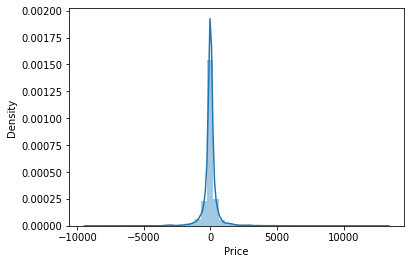

In [ ]:
sns.distplot(Y_train-random_rg_train_pred)

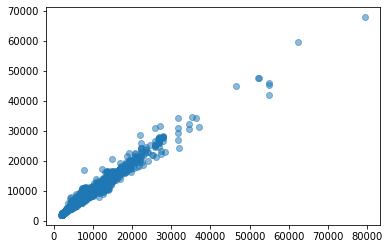

In [ ]:
plt.scatter(Y_train, random_rg_train_pred, alpha = 0.5)

In [ ]:
# r2_score
print('r2_score: ', metrics.r2_score(Y_train, random_rg_train_pred))

r2_score:  0.9812985092848422


In [ ]:
# Mean_absolute_error
print('Mean_absolute_error: ', metrics.mean_absolute_error(Y_train, random_rg_train_pred))

# Mean_squared_error
print('Mean_squared_error: ', metrics.mean_squared_error(Y_train, random_rg_train_pred))

# Root mean_squared_error
print('Root mean_squared_error: ', (np.sqrt(metrics.mean_squared_error(Y_train, random_rg_train_pred))))

Mean_absolute_error:  279.5119093644584
Mean_squared_error:  410625.27850345435
Root mean_squared_error:  640.80049820787


In [ ]:
# For test
random_rg_test_pred = random_rg.predict(X_test)


In [ ]:
random_rg.score(X_test, Y_test)

0.8681668236993858

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


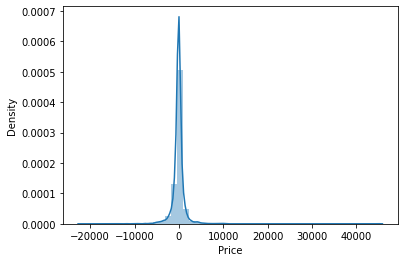

In [ ]:
sns.distplot(Y_test-random_rg_test_pred)

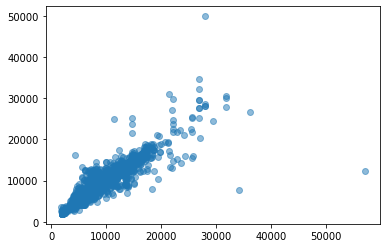

In [ ]:
plt.scatter(Y_test, random_rg_test_pred, alpha=0.5)

In [ ]:
# r2_score
print('r2_score: ', metrics.r2_score(Y_test, random_rg_test_pred))

r2_score:  0.8681668236993858


In [ ]:
# Mean_absolute_error
print('Mean_absolute_error: ', metrics.mean_absolute_error(Y_test, random_rg_test_pred))

# Mean_squared_error
print('Mean_squared_error: ', metrics.mean_squared_error(Y_test, random_rg_test_pred))

# Root mean_squared_error
print('Root mean_squared_error: ', (np.sqrt(metrics.mean_squared_error(Y_test, random_rg_test_pred))))

Mean_absolute_error:  697.4367379388038
Mean_squared_error:  2614506.0795085747
Root mean_squared_error:  1616.9434373250583


# AdaBoost Regressor (Adaptive Boosting)

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
adab_rg = AdaBoostRegressor()
adab_rg.fit(X_train, Y_train)

AdaBoostRegressor()

In [ ]:
adab_rg_pred = adab_rg.predict(X_test)

In [ ]:
adab_rg.score(X_test, Y_test)

0.45278091394668973

In [ ]:
# r2_score
print('r2_score: ', metrics.r2_score(Y_test, adab_rg_pred))

r2_score:  0.45278091394668973


In [ ]:
# Mean_absolute_error
print('Mean_absolute_error: ', metrics.mean_absolute_error(Y_test, adab_rg_pred))

# Mean_squared_error
print('Mean_squared_error: ', metrics.mean_squared_error(Y_test, adab_rg_pred))

# Root mean_squared_error
print('Root mean_squared_error: ', (np.sqrt(metrics.mean_squared_error(Y_test, adab_rg_pred))))

Mean_absolute_error:  2593.6919099559877
Mean_squared_error:  10852409.594130676
Root mean_squared_error:  3294.299560472708


# AdaBoost Classifier (Adaptive Boosting)

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
adab_clf = AdaBoostClassifier()
adab_clf.fit(X_train, Y_train)

AdaBoostClassifier()

In [ ]:
adab_clf_pred = adab_clf.predict(X_test)
print('Confusion matrix : \n', confusion_matrix(Y_test,adab_clf_pred),'\n')
print('Accuracy Score : ', accuracy_score(Y_test,adab_clf_pred)*100,'\n')
print("Classification Report:", "\n", classification_report(Y_test,adab_clf_pred))

Confusion matrix : 
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]] 

Accuracy Score :  1.3896766874645492 

Classification Report: 
               precision    recall  f1-score   support

      1759.0       0.00      0.00      0.00         1
      1840.0       0.00      0.00      0.00         1
      1965.0       0.00      0.00      0.00        11
      2017.0       0.00      0.00      0.00        17
      2050.0       0.00      0.00      0.00         2
      2071.0       0.00      0.00      0.00         2
      2175.0       0.00      0.00      0.00         2
      2227.0       0.00      0.00      0.00        15
      2228.0       0.00      0.00      0.00         4
      2385.0       0.00      0.00      0.00         2
      2437.0       0.00      0.00      0.00         3
      2575.0       0.00      0.00      0.00         4
      2647.0       0.00      0.00      0.00         2
      2753.0       0.00      0.00   

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# CatBoostClassifier

In [ ]:
# from catboost import CatBoostClassifier
cat = CatBoostClassifier()
cat.fit(X_train, Y_train)

In [ ]:
cat_pred = cat.predict(X_test)
print('Confusion matrix : \n', confusion_matrix(Y_test,cat_pred),'\n')
print('Accuracy Score : ', accuracy_score(Y_test,cat_pred)*100,'\n')
print("Classification Report:", "\n", classification_report(Y_test,cat_pred))

Confusion matrix : 
 [[32391  1555]
 [ 4438  5264]] 

Accuracy Score :  86.26970307917888 

Classification Report: 
               precision    recall  f1-score   support

           0       0.88      0.95      0.92     33946
           1       0.77      0.54      0.64      9702

    accuracy                           0.86     43648
   macro avg       0.83      0.75      0.78     43648
weighted avg       0.86      0.86      0.85     43648



In [ ]:
# Mean_absolute_error
print('Mean_absolute_error: ', metrics.mean_absolute_error(Y_test, cat_pred))

# Mean_squared_error
print('Mean_squared_error: ', metrics.mean_squared_error(Y_test, cat_pred))

# Root mean_squared_error
print('Root mean_squared_error: ', (np.sqrt(metrics.mean_squared_error(Y_test, cat_pred))))

Mean_absolute_error:  0.13730296920821114
Mean_squared_error:  0.13730296920821114
Root mean_squared_error:  0.3705441528457994


# XGBClassifier

In [ ]:
# from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train, Y_train)

XGBClassifier(objective='multi:softprob')

In [ ]:
xgb_pred = xgb.predict(X_test)
print('Confusion matrix : \n', confusion_matrix(Y_test,xgb_pred),'\n')
print('Accuracy Score : ', accuracy_score(Y_test,xgb_pred)*100,'\n')
print("Classification Report:", "\n", classification_report(Y_test,xgb_pred))

Confusion matrix : 
 [[ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0 11 ...  0  0  0]
 ...
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]] 

Accuracy Score :  54.197390811117415 

Classification Report: 
               precision    recall  f1-score   support

      1759.0       0.00      0.00      0.00         1
      1840.0       0.00      0.00      0.00         1
      1965.0       0.73      1.00      0.85        11
      2017.0       0.80      0.94      0.86        17
      2050.0       0.20      0.50      0.29         2
      2071.0       0.50      0.50      0.50         2
      2175.0       0.00      0.00      0.00         2
      2227.0       0.86      0.80      0.83        15
      2228.0       0.50      0.25      0.33         4
      2385.0       0.50      0.50      0.50         2
      2437.0       0.00      0.00      0.00         3
      2470.0       0.00      0.00      0.00         0
      2575.0       1.00      0.75      0.86         4


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1

In [ ]:
# Mean_absolute_error
print('Mean_absolute_error: ', metrics.mean_absolute_error(Y_test, xgb_pred))

# Mean_squared_error
print('Mean_squared_error: ', metrics.mean_squared_error(Y_test, xgb_pred))

# Root mean_squared_error
print('Root mean_squared_error: ', (np.sqrt(metrics.mean_squared_error(Y_test, xgb_pred))))

Mean_absolute_error:  859.3925127623369
Mean_squared_error:  5233358.10720363
Root mean_squared_error:  2287.6534062666988


# LogisticRegression

In [ ]:
# from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train, Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [ ]:
log_reg_pred = log_reg.predict(X_test)
print('Confusion matrix : \n', confusion_matrix(Y_test,log_reg_pred),'\n')
print('Accuracy Score : ', accuracy_score(Y_test,log_reg_pred)*100,'\n')
print("Classification Report:", "\n", classification_report(Y_test,log_reg_pred))

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1

Confusion matrix : 
 [[ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0 11 ...  0  0  0]
 ...
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]] 

Accuracy Score :  39.81849120816789 

Classification Report: 
               precision    recall  f1-score   support

      1759.0       0.00      0.00      0.00         1
      1840.0       0.00      0.00      0.00         1
      1965.0       0.73      1.00      0.85        11
      2017.0       0.76      0.94      0.84        17
      2050.0       0.00      0.00      0.00         2
      2071.0       0.00      0.00      0.00         2
      2175.0       0.00      0.00      0.00         2
      2227.0       0.50      0.80      0.62        15
      2228.0       0.00      0.00      0.00         4
      2385.0       0.50      0.50      0.50         2
      2437.0       0.00      0.00      0.00         3
      2575.0       0.00      0.00      0.00         4
      2647.0       0.00      0.00      0.00         2
 

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Mean_absolute_error
print('Mean_absolute_error: ', metrics.mean_absolute_error(Y_test, log_reg_pred))

# Mean_squared_error
print('Mean_squared_error: ', metrics.mean_squared_error(Y_test, log_reg_pred))

# Root mean_squared_error
print('Root mean_squared_error: ', (np.sqrt(metrics.mean_squared_error(Y_test, log_reg_pred))))

Mean_absolute_error:  1486.1914350538855
Mean_squared_error:  9055898.788712421
Root mean_squared_error:  3009.3020434500127


# Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression()
linear_reg.fit(X_train, Y_train)

LinearRegression()

In [ ]:
linear_reg_pred = linear_reg.predict(X_test)

In [ ]:
linear_reg.score(X_test, Y_test)

0.45449840356243076

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


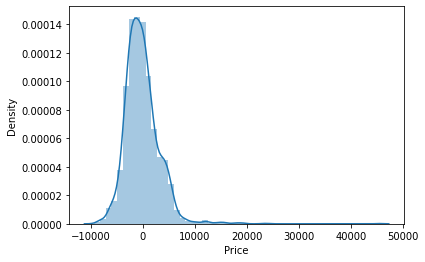

In [ ]:
sns.distplot(Y_test-linear_reg_pred)

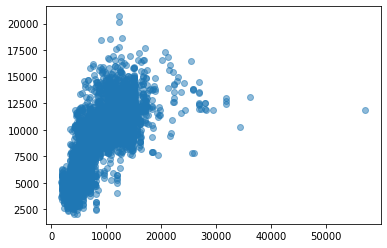

In [ ]:
plt.scatter(Y_test, linear_reg_pred, alpha=0.5)

In [ ]:
# r2_score
print('r2_score: ', metrics.r2_score(Y_test, linear_reg_pred))

r2_score:  0.45449840356243076


In [ ]:
# Mean_absolute_error
print('Mean_absolute_error: ', metrics.mean_absolute_error(Y_test, linear_reg_pred))

# Mean_squared_error
print('Mean_squared_error: ', metrics.mean_squared_error(Y_test, linear_reg_pred))

# Root mean_squared_error
print('Root mean_squared_error: ', (np.sqrt(metrics.mean_squared_error(Y_test, linear_reg_pred))))

Mean_absolute_error:  2411.307256708316
Mean_squared_error:  10818348.463481676
Root mean_squared_error:  3289.1257901578765


# GaussianNB

In [ ]:
# from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, Y_train)

GaussianNB()

In [ ]:
gnb_pred = gnb.predict(X_test)
print('Confusion matrix : \n', confusion_matrix(Y_test,gnb_pred),'\n')
print('Accuracy Score : ', accuracy_score(Y_test,gnb_pred)*100,'\n')
print("Classification Report:", "\n", classification_report(Y_test,gnb_pred))

Confusion matrix : 
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 3 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]] 

Accuracy Score :  34.288145207033466 

Classification Report: 
               precision    recall  f1-score   support

      1759.0       0.00      0.00      0.00         1
      1840.0       0.00      0.00      0.00         1
      1965.0       1.00      0.27      0.43        11
      2017.0       0.00      0.00      0.00        17
      2050.0       0.18      1.00      0.31         2
      2071.0       0.00      0.00      0.00         2
      2175.0       0.00      0.00      0.00         2
      2227.0       0.00      0.00      0.00        15
      2228.0       0.14      0.25      0.18         4
      2385.0       0.17      1.00      0.29         2
      2437.0       0.12      0.33      0.18         3
      2470.0       0.00      0.00      0.00         0
      2575.0       0.33      0.25      0.29         4
      2647.0       0.00      0.00   

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1

In [ ]:
# Mean_absolute_error
print('Mean_absolute_error: ', metrics.mean_absolute_error(Y_test, gnb_pred))

# Mean_squared_error
print('Mean_squared_error: ', metrics.mean_squared_error(Y_test, gnb_pred))

# Root mean_squared_error
print('Root mean_squared_error: ', (np.sqrt(metrics.mean_squared_error(Y_test, gnb_pred))))

Mean_absolute_error:  1207.3176403857062
Mean_squared_error:  6802786.273964833
Root mean_squared_error:  2608.215151011287


# KNeighborsClassifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)

KNeighborsClassifier()

In [ ]:
knn_pred = knn.predict(X_test)
print('Confusion matrix : \n', confusion_matrix(Y_test,knn_pred),'\n')
print('Accuracy Score : ', accuracy_score(Y_test,knn_pred)*100,'\n')
print("Classification Report:", "\n", classification_report(Y_test,knn_pred))

Confusion matrix : 
 [[ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0 10 ...  0  0  0]
 ...
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]] 

Accuracy Score :  38.96766874645491 

Classification Report: 
               precision    recall  f1-score   support

      1759.0       0.00      0.00      0.00         1
      1840.0       0.00      0.00      0.00         1
      1965.0       0.36      0.91      0.51        11
      2017.0       0.45      0.29      0.36        17
      2050.0       0.10      0.50      0.17         2
      2071.0       0.50      0.50      0.50         2
      2175.0       0.00      0.00      0.00         2
      2227.0       0.52      0.73      0.61        15
      2228.0       0.00      0.00      0.00         4
      2385.0       0.00      0.00      0.00         2
      2437.0       0.00      0.00      0.00         3
      2575.0       0.00      0.00      0.00         4
      2647.0       1.00      0.50      0.67         2
 

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1

In [ ]:
# Mean_absolute_error
print('Mean_absolute_error: ', metrics.mean_absolute_error(Y_test, knn_pred))

# Mean_squared_error
print('Mean_squared_error: ', metrics.mean_squared_error(Y_test, knn_pred))

# Root mean_squared_error
print('Root mean_squared_error: ', (np.sqrt(metrics.mean_squared_error(Y_test, knn_pred))))

Mean_absolute_error:  1374.4064095292115
Mean_squared_error:  7953815.15456608
Root mean_squared_error:  2820.2509027684187


# DecisionTreeClassifier

In [ ]:
# from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, Y_train)

DecisionTreeClassifier()

In [ ]:
dtc_pred = dtc.predict(X_test)
print('Confusion matrix : \n', confusion_matrix(Y_test,dtc_pred),'\n')
print('Accuracy Score : ', accuracy_score(Y_test,dtc_pred)*100,'\n')
print("Classification Report:", "\n", classification_report(Y_test,dtc_pred))

Confusion matrix : 
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 9 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]] 

Accuracy Score :  52.46738513896767 

Classification Report: 
               precision    recall  f1-score   support

      1759.0       0.00      0.00      0.00         1
      1840.0       0.00      0.00      0.00         1
      1965.0       0.90      0.82      0.86        11
      2017.0       0.86      0.71      0.77        17
      2050.0       0.50      0.50      0.50         2
      2071.0       0.25      0.50      0.33         2
      2175.0       0.00      0.00      0.00         2
      2227.0       0.69      0.73      0.71        15
      2228.0       0.50      0.50      0.50         4
      2385.0       0.50      0.50      0.50         2
      2437.0       0.00      0.00      0.00         3
      2470.0       0.00      0.00      0.00         0
      2575.0       1.00      0.75      0.86         4
      2647.0       1.00      1.00    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1

In [ ]:
# Mean_absolute_error
print('Mean_absolute_error: ', metrics.mean_absolute_error(Y_test, dtc_pred))

# Mean_squared_error
print('Mean_squared_error: ', metrics.mean_squared_error(Y_test, dtc_pred))

# Root mean_squared_error
print('Root mean_squared_error: ', (np.sqrt(metrics.mean_squared_error(Y_test, dtc_pred))))

Mean_absolute_error:  813.0901871809416
Mean_squared_error:  4299685.718661373
Root mean_squared_error:  2073.5683539882093


# LightGBM Model

In [ ]:
# build the lightgbm model
import lightgbm as lgb
lgb_model = lgb.LGBMClassifier()
lgb_model.fit(X_train, Y_train)

LGBMClassifier()

In [ ]:
lgb_predictions=lgb_model.predict(X_test)
print('Confusion matrix : \n', confusion_matrix(Y_test,lgb_predictions),'\n')
# Accuracy Score
print('Accuracy Score : ', accuracy_score(Y_test,lgb_predictions)*100,'\n')
print("Classification Report:", "\n", classification_report(Y_test, lgb_predictions))

Confusion matrix : 
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 6 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]] 

Accuracy Score :  10.323312535450937 

Classification Report: 
               precision    recall  f1-score   support

      1759.0       0.00      0.00      0.00         1
      1840.0       0.00      0.00      0.00         1
      1965.0       0.46      0.55      0.50        11
      2017.0       0.47      0.53      0.50        17
      2050.0       0.20      0.50      0.29         2
      2071.0       0.00      0.00      0.00         2
      2175.0       0.00      0.00      0.00         2
      2227.0       0.00      0.00      0.00        15
      2228.0       0.00      0.00      0.00         4
      2385.0       0.00      0.00      0.00         2
      2437.0       0.00      0.00      0.00         3
      2575.0       0.17      0.25      0.20         4
      2647.0       0.25      0.50      0.33         2
      2753.0       0.17      0.33   

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1

In [ ]:
# Mean_absolute_error
print('Mean_absolute_error: ', metrics.mean_absolute_error(Y_test, lgb_predictions))

# Mean_squared_error
print('Mean_squared_error: ', metrics.mean_squared_error(Y_test, lgb_predictions))

# Root mean_squared_error
print('Root mean_squared_error: ', (np.sqrt(metrics.mean_squared_error(Y_test, lgb_predictions))))

Mean_absolute_error:  3150.6159954622804
Mean_squared_error:  21999508.79466818
Root mean_squared_error:  4690.363396866834


# Support Vector Clustering (SVC)

In [ ]:
# from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, Y_train)

SVC()

In [ ]:
svc_pred = svc.predict(X_test)
print('Confusion matrix : \n', confusion_matrix(Y_test,svc_pred),'\n')
print('Accuracy Score : ', accuracy_score(Y_test,svc_pred)*100,'\n')
print("Classification Report:", "\n", classification_report(Y_test,svc_pred))

Confusion matrix : 
 [[ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0 11 ...  0  0  0]
 ...
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]] 

Accuracy Score :  38.11684628474192 

Classification Report: 
               precision    recall  f1-score   support

      1759.0       0.00      0.00      0.00         1
      1840.0       0.00      0.00      0.00         1
      1965.0       0.31      1.00      0.47        11
      2017.0       0.50      0.35      0.41        17
      2050.0       0.00      0.00      0.00         2
      2071.0       0.00      0.00      0.00         2
      2175.0       0.00      0.00      0.00         2
      2227.0       0.50      0.80      0.62        15
      2228.0       0.00      0.00      0.00         4
      2385.0       0.00      0.00      0.00         2
      2437.0       0.00      0.00      0.00         3
      2575.0       0.00      0.00      0.00         4
      2647.0       0.00      0.00      0.00         2
 

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1

In [ ]:
# Mean_absolute_error
print('Mean_absolute_error: ', metrics.mean_absolute_error(Y_test, svc_pred))

# Mean_squared_error
print('Mean_squared_error: ', metrics.mean_squared_error(Y_test, svc_pred))

# Root mean_squared_error
print('Root mean_squared_error: ', (np.sqrt(metrics.mean_squared_error(Y_test, svc_pred))))

Mean_absolute_error:  1519.0289279636982
Mean_squared_error:  9010065.610323312
Root mean_squared_error:  3001.677132924744


# Alll Accuracy Score

In [ ]:
print('Random Forest Classifier Accuracy Score : ', accuracy_score(Y_test, random_forest_test_predictions)*100,'\n')

print('Random Forest Regressor Score : ', random_rg.score(X_train, Y_train)*100, '\n')

print('AdaBoost Classifier Accuracy Score : ', accuracy_score(Y_test, adab_clf_pred)*100,'\n')

print('AdaBoost Regressor Score : ', adab_rg.score(X_test, Y_test)*100, '\n')

print('CatBoost Classifier Accuracy Score : ', accuracy_score(Y_test, cat_pred)*100,'\n')

print('XGBoost Classifier Accuracy Score : ', accuracy_score(Y_test,xgb_pred)*100,'\n')

print('Logistic Regression Accuracy Score : ', accuracy_score(Y_test,log_reg_pred)*100,'\n')

print('Linear Regression Score : ', linear_reg.score(X_test, Y_test)*100,'\n')

print('GaussianNB Accuracy Score : ', accuracy_score(Y_test, gnb_pred)*100,'\n')

print('KNeighbors Classifier Accuracy Score : ', accuracy_score(Y_test, knn_pred)*100,'\n')

print('DecisionTree Classifier Accuracy Score : ', accuracy_score(Y_test, dtc_pred)*100,'\n')

print('LightGBM Accuracy Score : ', accuracy_score(Y_test, lgb_predictions)*100,'\n')

print('Support Vector Clustering Accuracy Score : ', accuracy_score(Y_test, svc_pred)*100,'\n')

Random Forest Classifier Accuracy Score :  52.0986954055587 

Random Forest Regressor Score :  98.12985092848422 

AdaBoost Classifier Accuracy Score :  1.3896766874645492 

AdaBoost Regressor Score :  45.27809139466898 

Logistic Regression Accuracy Score :  39.81849120816789 

KNeighbors Classifier Accuracy Score :  38.96766874645491 

DecisionTree Classifier Accuracy Score :  52.46738513896767 

LightGBM Accuracy Score :  10.323312535450937 

Support Vector Clustering Accuracy Score :  38.11684628474192 

